In [1]:
import random
import simpy
import pandas as pd

orders = {}

env = simpy.Environment()

env.run()

df = pd.DataFrame(orders).T
display(df)

""


<AxesSubplot:xlabel='Order number', ylabel='Time ordered received.'>

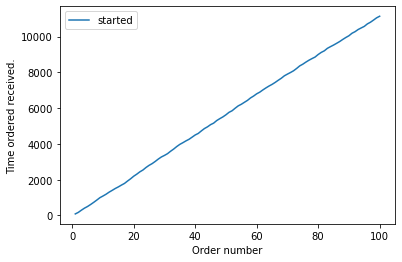

In [2]:
import random
import simpy
import pandas as pd

orders = {}

def order_generator(n_orders=100):
    order_id = 0
    while order_id < n_orders:
        yield env.timeout(random.uniform(115 - 30, 115 + 30))
        order_id += 1
        orders[order_id] = {"started": env.now}

env = simpy.Environment()

env.process(order_generator(100))
env.run()

df = pd.DataFrame(orders).T
df.plot(xlabel="Order number", ylabel="Time ordered received.")

<AxesSubplot:xlabel='Order number', ylabel='Time ordered received.'>

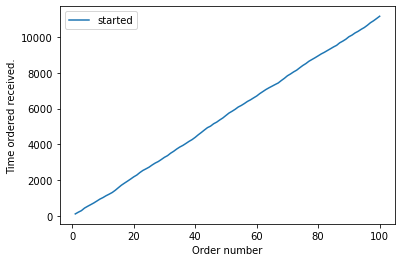

In [3]:
import random
import simpy
import pandas as pd

orders = {}

def order_generator(n_orders=100):
    order_id = 0
    while order_id < n_orders:
        yield env.timeout(random.uniform(115 - 30, 115 + 30))
        order_id += 1
        orders[order_id] = {"started": env.now}
        
env = simpy.Environment()

reactors = simpy.Store(env)
reactors.items = ["Reactor A", "Reactor B", "Reactor C"]

tanks = simpy.Store(env)
tanks.items = ["Tank A"]

stills = simpy.Store(env)
stills.time = ["Still A"]

env.process(order_generator(100))
env.run()

df = pd.DataFrame(orders).T
df.plot(xlabel="Order number", ylabel="Time ordered received.")

<AxesSubplot:xlabel='Order number', ylabel='Time ordered received.'>

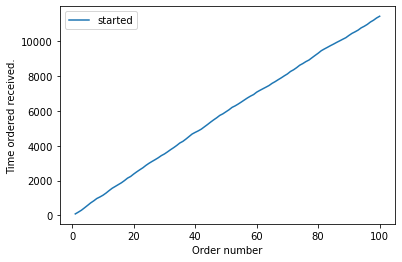

In [4]:
import random
import simpy
import pandas as pd

orders = {}

def order_generator(n_orders=100):
    order_id = 0
    while order_id < n_orders:
        yield env.timeout(random.uniform(115 - 30, 115 + 30))
        order_id += 1
        orders[order_id] = {"started": env.now}
        
def order_processor(order_id):
    
    reactor = yield reactors.get()
    orders[order_id]["reaction started"] = env.now
    yield env.timeout(random.uniform(335 - 60, 335 + 60))
    orders[order_id]["reaction finished"] = env.now

    tank = yield tanks.get()
    orders[order_id]["storage started"] = env.now
    reactors.put(reactor)

    still = yield stills.get()
    orders[order_id]["still started"] = env.now
    yield env.timeout(random.uniform(110 - 20, 110 + 20))

    orders[order_id]["finished"] = env.now
    stills.put(still)
    tanks.put(tank)     
        
env = simpy.Environment()

reactors = simpy.Store(env)
reactors.items = ["Reactor A", "Reactor B", "Reactor C"]

tanks = simpy.Store(env)
tanks.items = ["Tank A"]

stills = simpy.Store(env)
stills.items = ["Still A"]

env.process(order_generator(100))
env.run()

df = pd.DataFrame(orders).T
df.plot(xlabel="Order number", ylabel="Time ordered received.")

<AxesSubplot:xlabel='Order number', ylabel='Time ordered received.'>

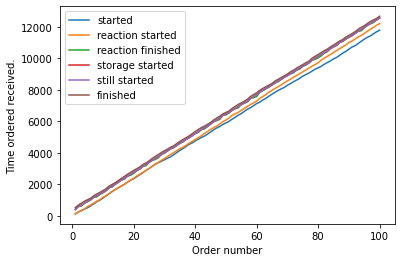

In [5]:
import random
import simpy
import pandas as pd

orders = {}

def order_generator(n_orders=100):
    order_id = 0
    while order_id < n_orders:
        yield env.timeout(random.uniform(115 - 30, 115 + 30))
        order_id += 1
        env.process(order_processor(order_id))
        
def order_processor(order_id):
    
    orders[order_id] = {"started": env.now}
    
    reactor = yield reactors.get()
    orders[order_id]["reaction started"] = env.now
    
    yield env.timeout(random.uniform(335 - 60, 335 + 60))
    orders[order_id]["reaction finished"] = env.now

    tank = yield tanks.get()
    orders[order_id]["storage started"] = env.now
    reactors.put(reactor)

    still = yield stills.get()
    orders[order_id]["still started"] = env.now
    yield env.timeout(random.uniform(110 - 20, 110 + 20))

    orders[order_id]["finished"] = env.now
    stills.put(still)
    tanks.put(tank)     
        
env = simpy.Environment()

reactors = simpy.Store(env)
reactors.items = ["Reactor A", "Reactor B", "Reactor C"]

tanks = simpy.Store(env)
tanks.items = ["Tank A"]

stills = simpy.Store(env)
stills.items = ["Still A"]

env.process(order_generator(100))
env.run()

df = pd.DataFrame(orders).T
df.plot(xlabel="Order number", ylabel="Time ordered received.")

<AxesSubplot:title={'center':'Elapsed Times'}>

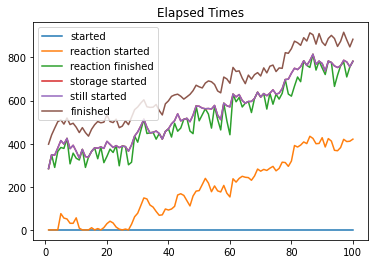

In [6]:
start_times = df["started"]
df.sub(start_times, axis=0).plot(title="Elapsed Times")

['Reactor 0', 'Reactor 1', 'Reactor 2']


started                0.000000
reaction started     192.752566
reaction finished    529.047615
storage started      555.201418
still started        555.201418
finished             664.573204
dtype: float64

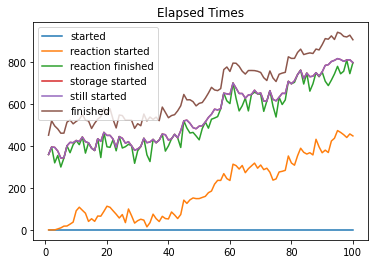

In [7]:
import random
import simpy
import pandas as pd

def simulation(
        order_times = [115-30, 115+30],
        reaction_times = [335-60, 335+60],
        still_times = [110-20, 110+20],
        n_orders = 100,
        n_reactors = 3,
        n_tanks = 1,
        n_stills = 1): 
    
    orders = {}

    def order_generator(n_orders=n_orders):
        order_id = 0
        while order_id < n_orders:
            yield env.timeout(random.uniform(*order_times))
            order_id += 1
            env.process(order_processor(order_id))

    def order_processor(order_id):

        orders[order_id] = {"started": env.now}

        reactor = yield reactors.get()
        orders[order_id]["reaction started"] = env.now

        yield env.timeout(random.uniform(*reaction_times))
        orders[order_id]["reaction finished"] = env.now

        tank = yield tanks.get()
        orders[order_id]["storage started"] = env.now
        reactors.put(reactor)

        still = yield stills.get()
        orders[order_id]["still started"] = env.now
        yield env.timeout(random.uniform(*still_times))

        orders[order_id]["finished"] = env.now
        stills.put(still)
        tanks.put(tank)     

    env = simpy.Environment()

    reactors = simpy.Store(env)
    reactors.items = [f"Reactor {n}" for n in range(0, n_reactors)]
    print(reactors.items)

    tanks = simpy.Store(env)
    tanks.items = [f"Tank {n}" for n in range(0, n_tanks)]
    
    stills = simpy.Store(env)
    stills.items = [f"Still {n}" for n in range(0, n_stills)]

    env.process(order_generator(n_orders))
    env.run()

    df = pd.DataFrame(orders).T
    start_times = df["started"]
    elapsed_times = df.sub(start_times, axis=0)
    elapsed_times.plot(title="Elapsed Times")
    display(elapsed_times.mean())
    
simulation(n_orders=100, n_reactors=3, n_tanks=1, n_stills=1)

['Reactor 0', 'Reactor 1', 'Reactor 2', 'Reactor 3']


started                0.000000
reaction started       0.040273
reaction finished    335.216126
storage started      335.391772
still started        335.391772
finished             445.510361
dtype: float64

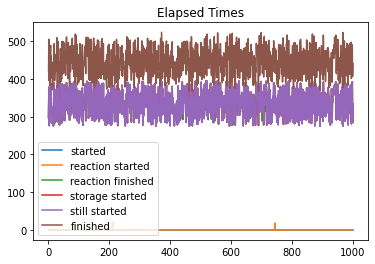

In [8]:
simulation(n_orders=1000, n_reactors=4, n_tanks=2, n_stills=2)